
### Segmentação de Imagens de Câncer de Mama

Vamos usar o dataset mini-MIAS disponível em http://peipa.essex.ac.uk/info/mias.html.

Este dataset possui 322 imagens de mamografias.

A **Segmentação de Imagem** envolve em colorir de uma mesma cor objetos ou partes de interesse. No caso do nosso dataset, iremos usar a segmentação de imagem para reduzir a resolução, aumentando o contraste entre diferentes regiões dos tecidos representados na imagem de mamografia.

O dataset é mais detalhado, possuindo inclusive tipos de câncer e anormalidades que ocorrem em cada uma das imagens.

Vamos apenas aplicar o K-Means em algumas imagens para observar o resultado:

In [17]:
# processamento de arquivos e imagens
from PIL import Image
import glob
import numpy as np

# para plotar imagens
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# para machine learning
from sklearn.cluster import KMeans

In [18]:
# carregando as imagens
img_G = mpimg.imread(r'D:\Documentos\FIAP - Pos Tech Data Analytics\Aulas\Fase 2\Dados\mdb001.pgm') # tipo g
img_D = mpimg.imread(r'D:\Documentos\FIAP - Pos Tech Data Analytics\Aulas\Fase 2\Dados\mdb003.pgm') # tipo d
img_F = mpimg.imread(r'D:\Documentos\FIAP - Pos Tech Data Analytics\Aulas\Fase 2\Dados\mdb005.pgm') # tipo f

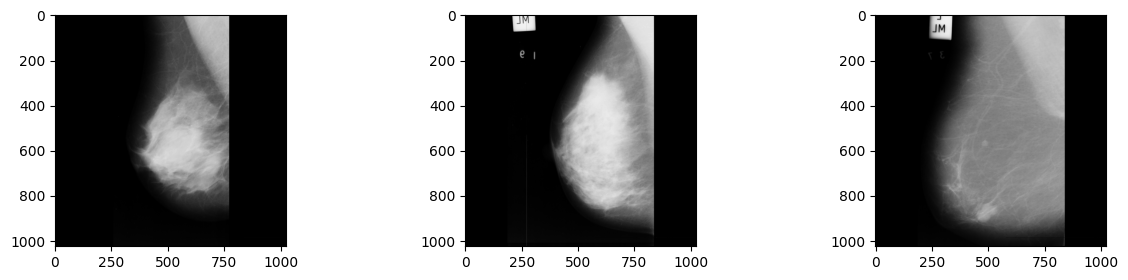

In [19]:
# plotando as imagens

fig, ax = plt.subplots(1, 3, figsize=(15, 3))
img1 = ax[0].imshow(img_G, cmap='gray', vmin=0, vmax=255)
img2 = ax[1].imshow(img_D, cmap='gray', vmin=0, vmax=255)
img3 = ax[2].imshow(img_F, cmap='gray', vmin=0, vmax=255)
plt.show()

In [22]:
# Essa função usa o Kmeans como um filtro de segmentação de imagem

def filtro_kmeans(img, clusters):
    vectorized = img.reshape((-1, 1))
    kmeans = KMeans(n_clusters=clusters, random_state=0, n_init=5)
    kmeans.fit(vectorized)

    centers = np.uint8(kmeans.cluster_centers_)
    segmented_data = centers[kmeans.labels_.flatten()]

    segmented_image = segmented_data.reshape((img.shape))
    return (segmented_image)

In [23]:
clusters = 3

img_G_segmented = filtro_kmeans(img_G, clusters)
img_D_segmented = filtro_kmeans(img_D, clusters)
img_F_segmented = filtro_kmeans(img_F, clusters)

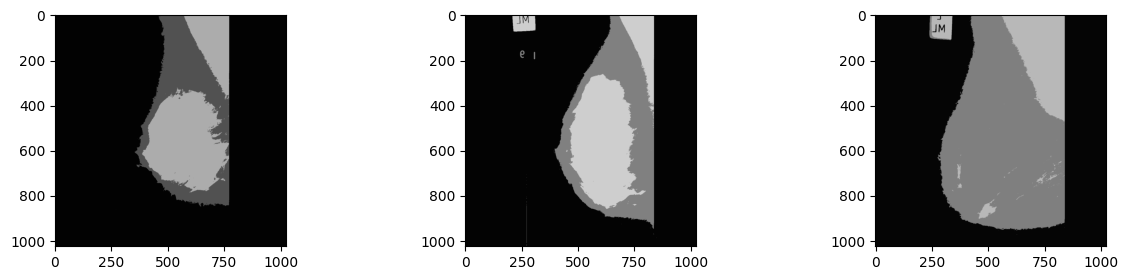

In [24]:
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
img1 = ax[0].imshow(img_G_segmented, cmap='gray', vmin=0, vmax=255)
img2 = ax[1].imshow(img_D_segmented, cmap='gray', vmin=0, vmax=255)
img3 = ax[2].imshow(img_F_segmented, cmap='gray', vmin=0, vmax=255)
plt.show()